# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import wandb

In [2]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# Import Preprocessed Data

In [3]:
data = pd.read_csv("C:/Users/Maha/Downloads/autos_preprocessed.csv", header=0, sep=',', encoding='Latin1')

# Label Encoding

In [4]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

mapper = {}
for i in labels:
    mapper[i] = LabelEncoder()
    mapper[i].fit(data[i])
    tr = mapper[i].transform(data[i])
    np.save(str('classes'+i+'.npy'), mapper[i].classes_)
    data.loc[:, i+'_labels'] = pd.Series(tr, index=data.index)
    
labeled = data[['price', 'yearOfRegistration','powerPS','kilometer','monthOfRegistration']
                  +[x+"_labels" for x in labels]]

print(labeled.columns)

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


# Score Evaluation

In [5]:
def find_scores(Y_actual, Y_pred, X_train):
    mae = mean_absolute_error(Y_actual, Y_pred)
    mse = mean_squared_error(Y_actual, Y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(Y_actual, Y_pred)
    n, k = X_train.shape
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    wandb.log({"mae": mae, "mse": mse, 'rmse':rmse, 'rmsle':rmsle, 'r2':r2, 'adj_r2':adj_r2_score})

# Predictive Modeling

# Bagging Regressor

In [6]:
def bagging_regressor():
    config_defaults = {
                'n_estimators':100,
                'max_samples':0.4,
                'bootstrap':True,
                'random_state':42
            }
    wandb.init(config=config_defaults)
    config = wandb.config
    
    X = labeled.iloc[:,1:].values
    Y = labeled.iloc[:,0].values.reshape(-1,1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
    
    model = BaggingRegressor(
      n_estimators=config.n_estimators, 
      bootstrap=config.bootstrap,
      max_samples=config.max_samples,
      random_state = config.random_state)
    
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    find_scores(Y_test, Y_pred, X_train)

In [7]:
bagging_regressor_configs = {
    "name":'BaggingRegressor',
    "method": "grid",
    "metric": {
        "name": "adj_r2",
        "goal": "maximize"
    },
    "parameters": {
        "n_estimators": {
            "values": [100, 200, 300]
        },
        "max_samples": {
            "values": [0.4,0.5, 0.6]
        }
    }
}

In [8]:
sweep_id = wandb.sweep(sweep=bagging_regressor_configs, project="car_resale_value")
wandb.agent(sweep_id=sweep_id, function=bagging_regressor)

Create sweep with ID: qazs1wvp
Sweep URL: https://wandb.ai/maha/car_resale_value/sweeps/qazs1wvp


wandb: Agent Starting Run: 4r3ljwa1 with config:
wandb: 	max_samples: 0.4
wandb: 	n_estimators: 100
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ygrrap15 with config:
wandb: 	max_samples: 0.4
wandb: 	n_estimators: 200
wandb: Currently logged in as: rajeshtr. Use `wandb login --relogin` to force relogin


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ep817v6k with config:
wandb: 	max_samples: 0.4
wandb: 	n_estimators: 300


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6fqaqg0s with config:
wandb: 	max_samples: 0.5
wandb: 	n_estimators: 100


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Agent Starting Run: e22c10t6 with config:
wandb: 	max_samples: 0.5
wandb: 	n_estimators: 200


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jf0v5kf4 with config:
wandb: 	max_samples: 0.5
wandb: 	n_estimators: 300


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ods3pu4j with config:
wandb: 	max_samples: 0.6
wandb: 	n_estimators: 100


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3ducxy78 with config:
wandb: 	max_samples: 0.6
wandb: 	n_estimators: 200


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Agent Starting Run: b3z35ga8 with config:
wandb: 	max_samples: 0.6
wandb: 	n_estimators: 300


C:\Users\Maha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


# Bagging Regressor Results

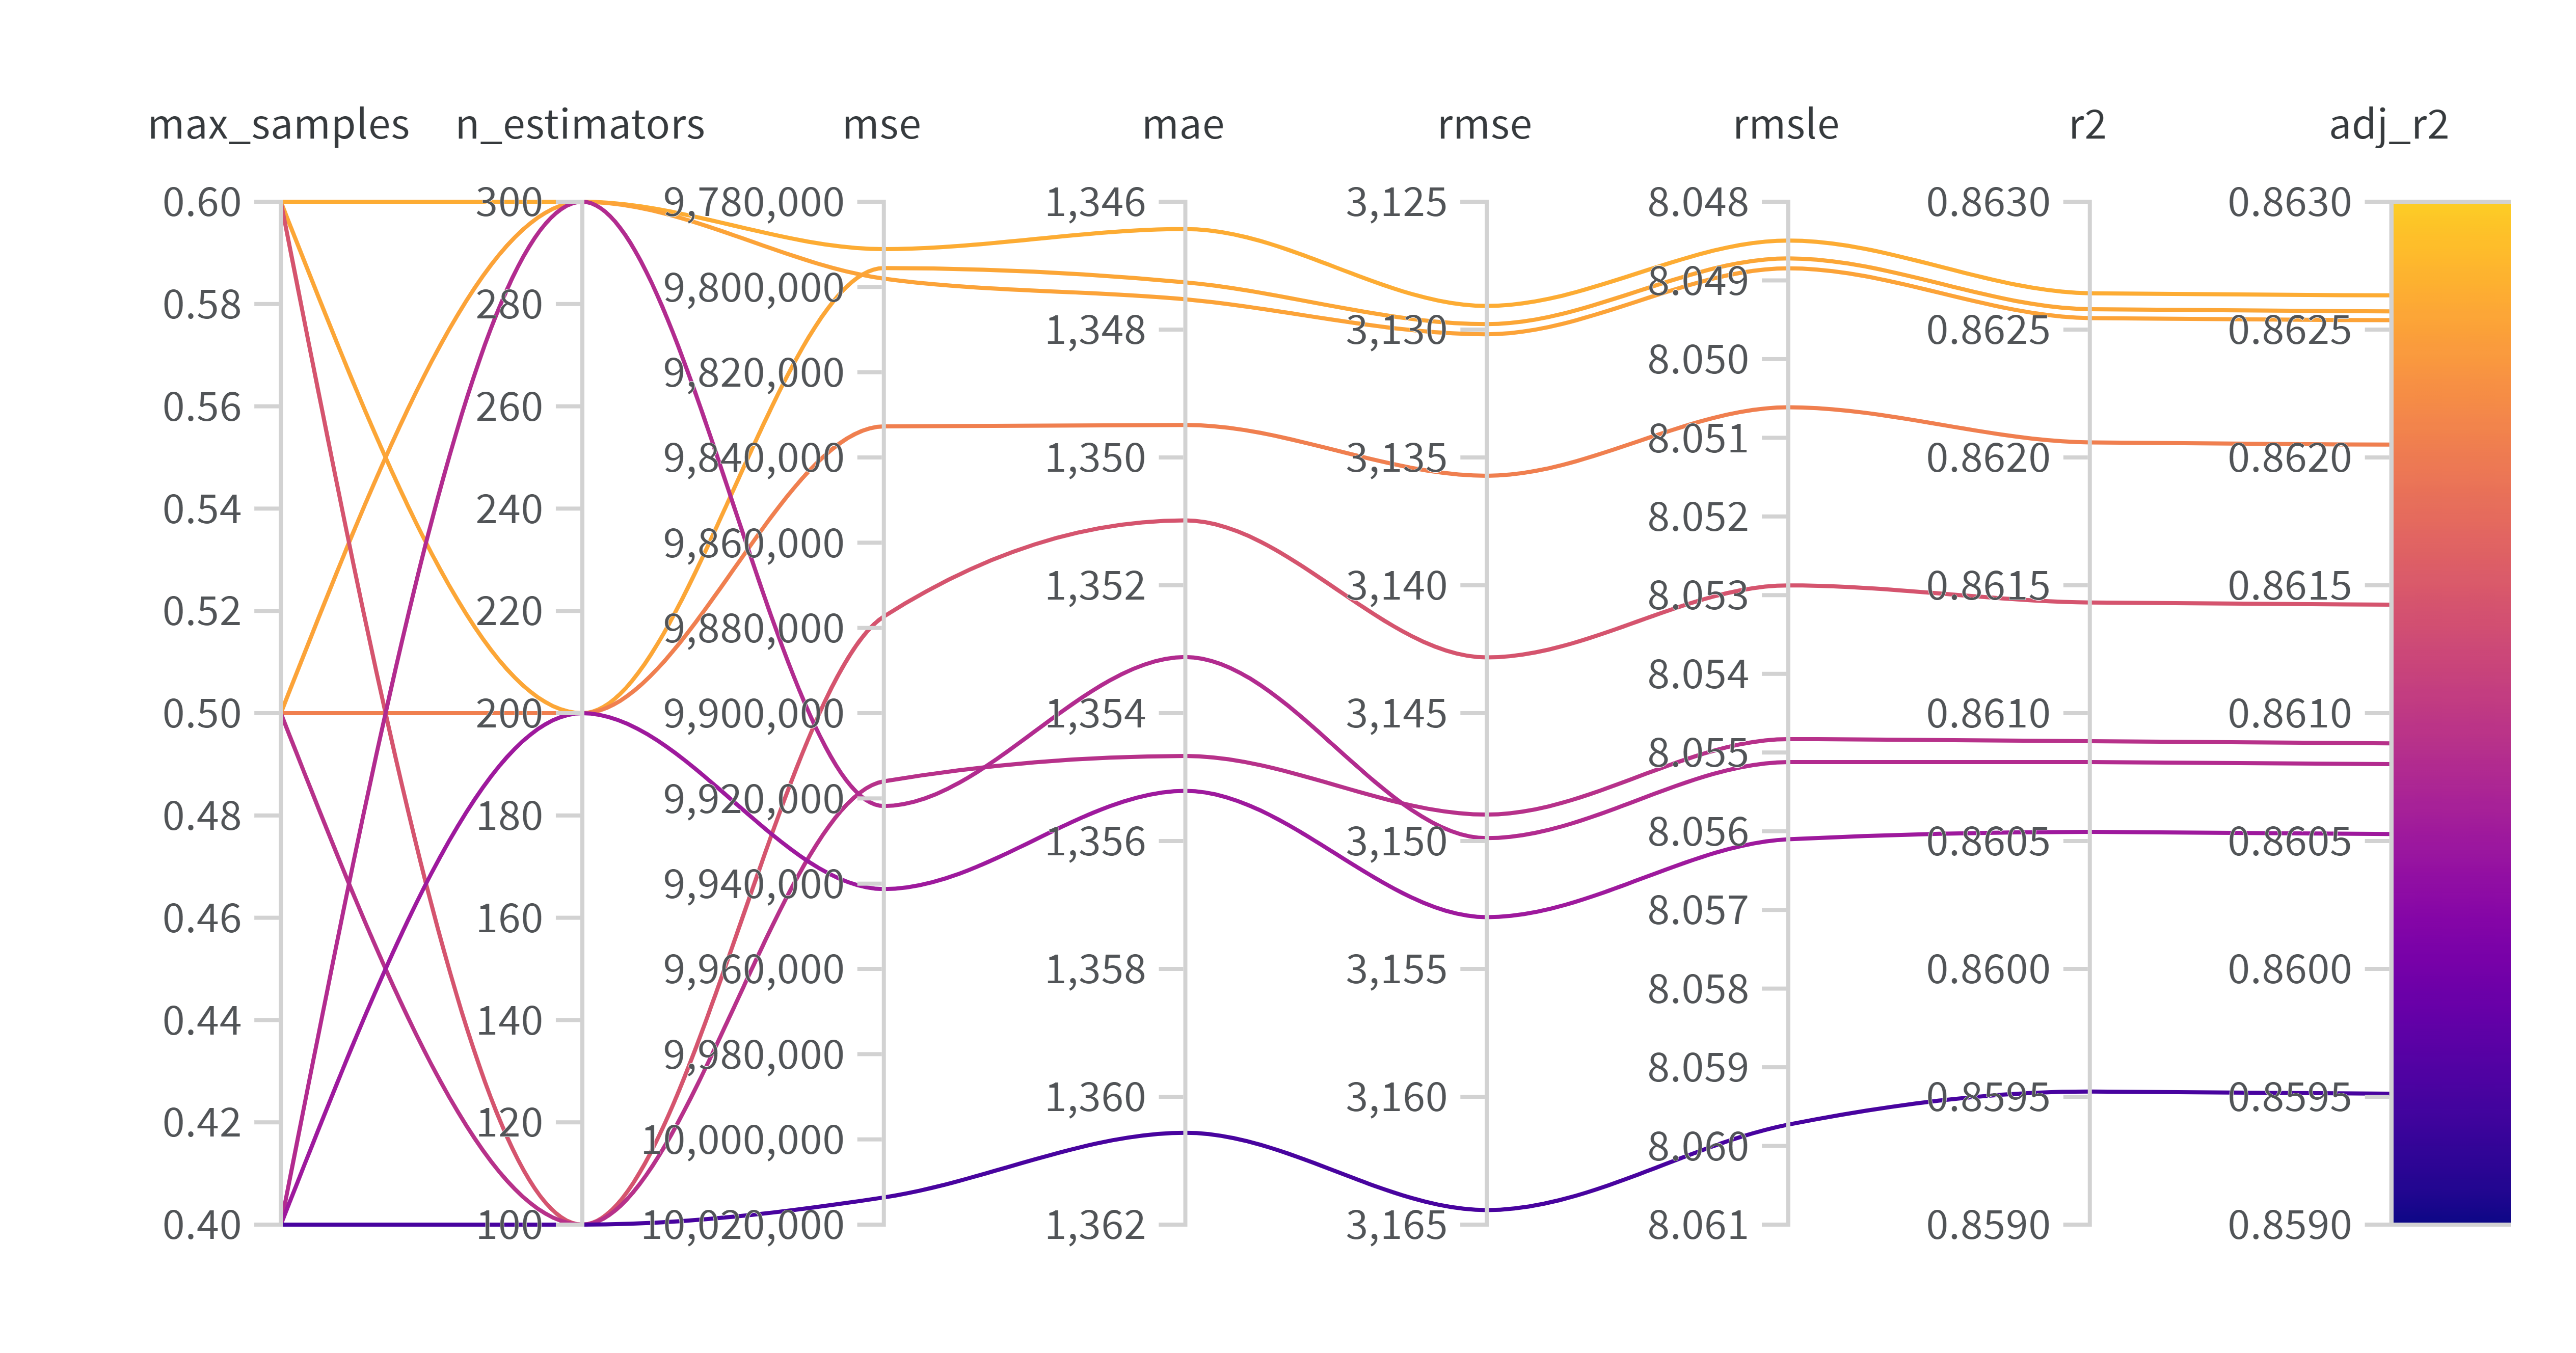

# RandomForest Regressor

In [9]:
def random_forest_regressor():
    config_defaults = {
                'n_estimators':100,
                'max_samples':0.4,
                'criterion':'squared_error',
                'bootstrap': True,
                'random_state':42
            }
    wandb.init(config=config_defaults)
    config = wandb.config
    
    X = labeled.iloc[:,1:].values
    Y = labeled.iloc[:,0].values.reshape(-1,1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
    
    model = RandomForestRegressor(
      n_estimators=config.n_estimators,
      criterion = config.criterion,
      bootstrap=config.bootstrap,
      max_samples=config.max_samples,
      random_state = config.random_state)
    
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    find_scores(Y_test, Y_pred, X_train)

In [10]:
random_forest_configs = {
    "name":'RandomForestRegressor',
    "method": "grid",
    "metric": {
        "name": "adj_r2",
        "goal": "maximize"
    },
    "parameters": {
        "n_estimators": {
            "values": [100, 200, 300]
        },
        "max_samples": {
            "values": [0.4,0.5, 0.6]
        }
    }
}

sweep_id = wandb.sweep(sweep=random_forest_configs, project="car_resale_value")
wandb.agent(sweep_id=sweep_id, function=random_forest_regressor)

Create sweep with ID: xvbhv8cq
Sweep URL: https://wandb.ai/rajeshtr/car_resale_value/sweeps/xvbhv8cq


wandb: Agent Starting Run: d9m5p5al with config:
wandb: 	max_samples: 0.4
wandb: 	n_estimators: 100


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Agent Starting Run: r4qy4pa3 with config:
wandb: 	max_samples: 0.4
wandb: 	n_estimators: 200


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q3c65msa with config:
wandb: 	max_samples: 0.4
wandb: 	n_estimators: 300


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g86l35eh with config:
wandb: 	max_samples: 0.5
wandb: 	n_estimators: 100


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: k49dwxi3 with config:
wandb: 	max_samples: 0.5
wandb: 	n_estimators: 200


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Agent Starting Run: bshp42ga with config:
wandb: 	max_samples: 0.5
wandb: 	n_estimators: 300


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Agent Starting Run: 4yzl5w76 with config:
wandb: 	max_samples: 0.6
wandb: 	n_estimators: 100


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i9kx2qcp with config:
wandb: 	max_samples: 0.6
wandb: 	n_estimators: 200


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bccpklwb with config:
wandb: 	max_samples: 0.6
wandb: 	n_estimators: 300


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\3309427692.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


# Random Forest Regressor Results

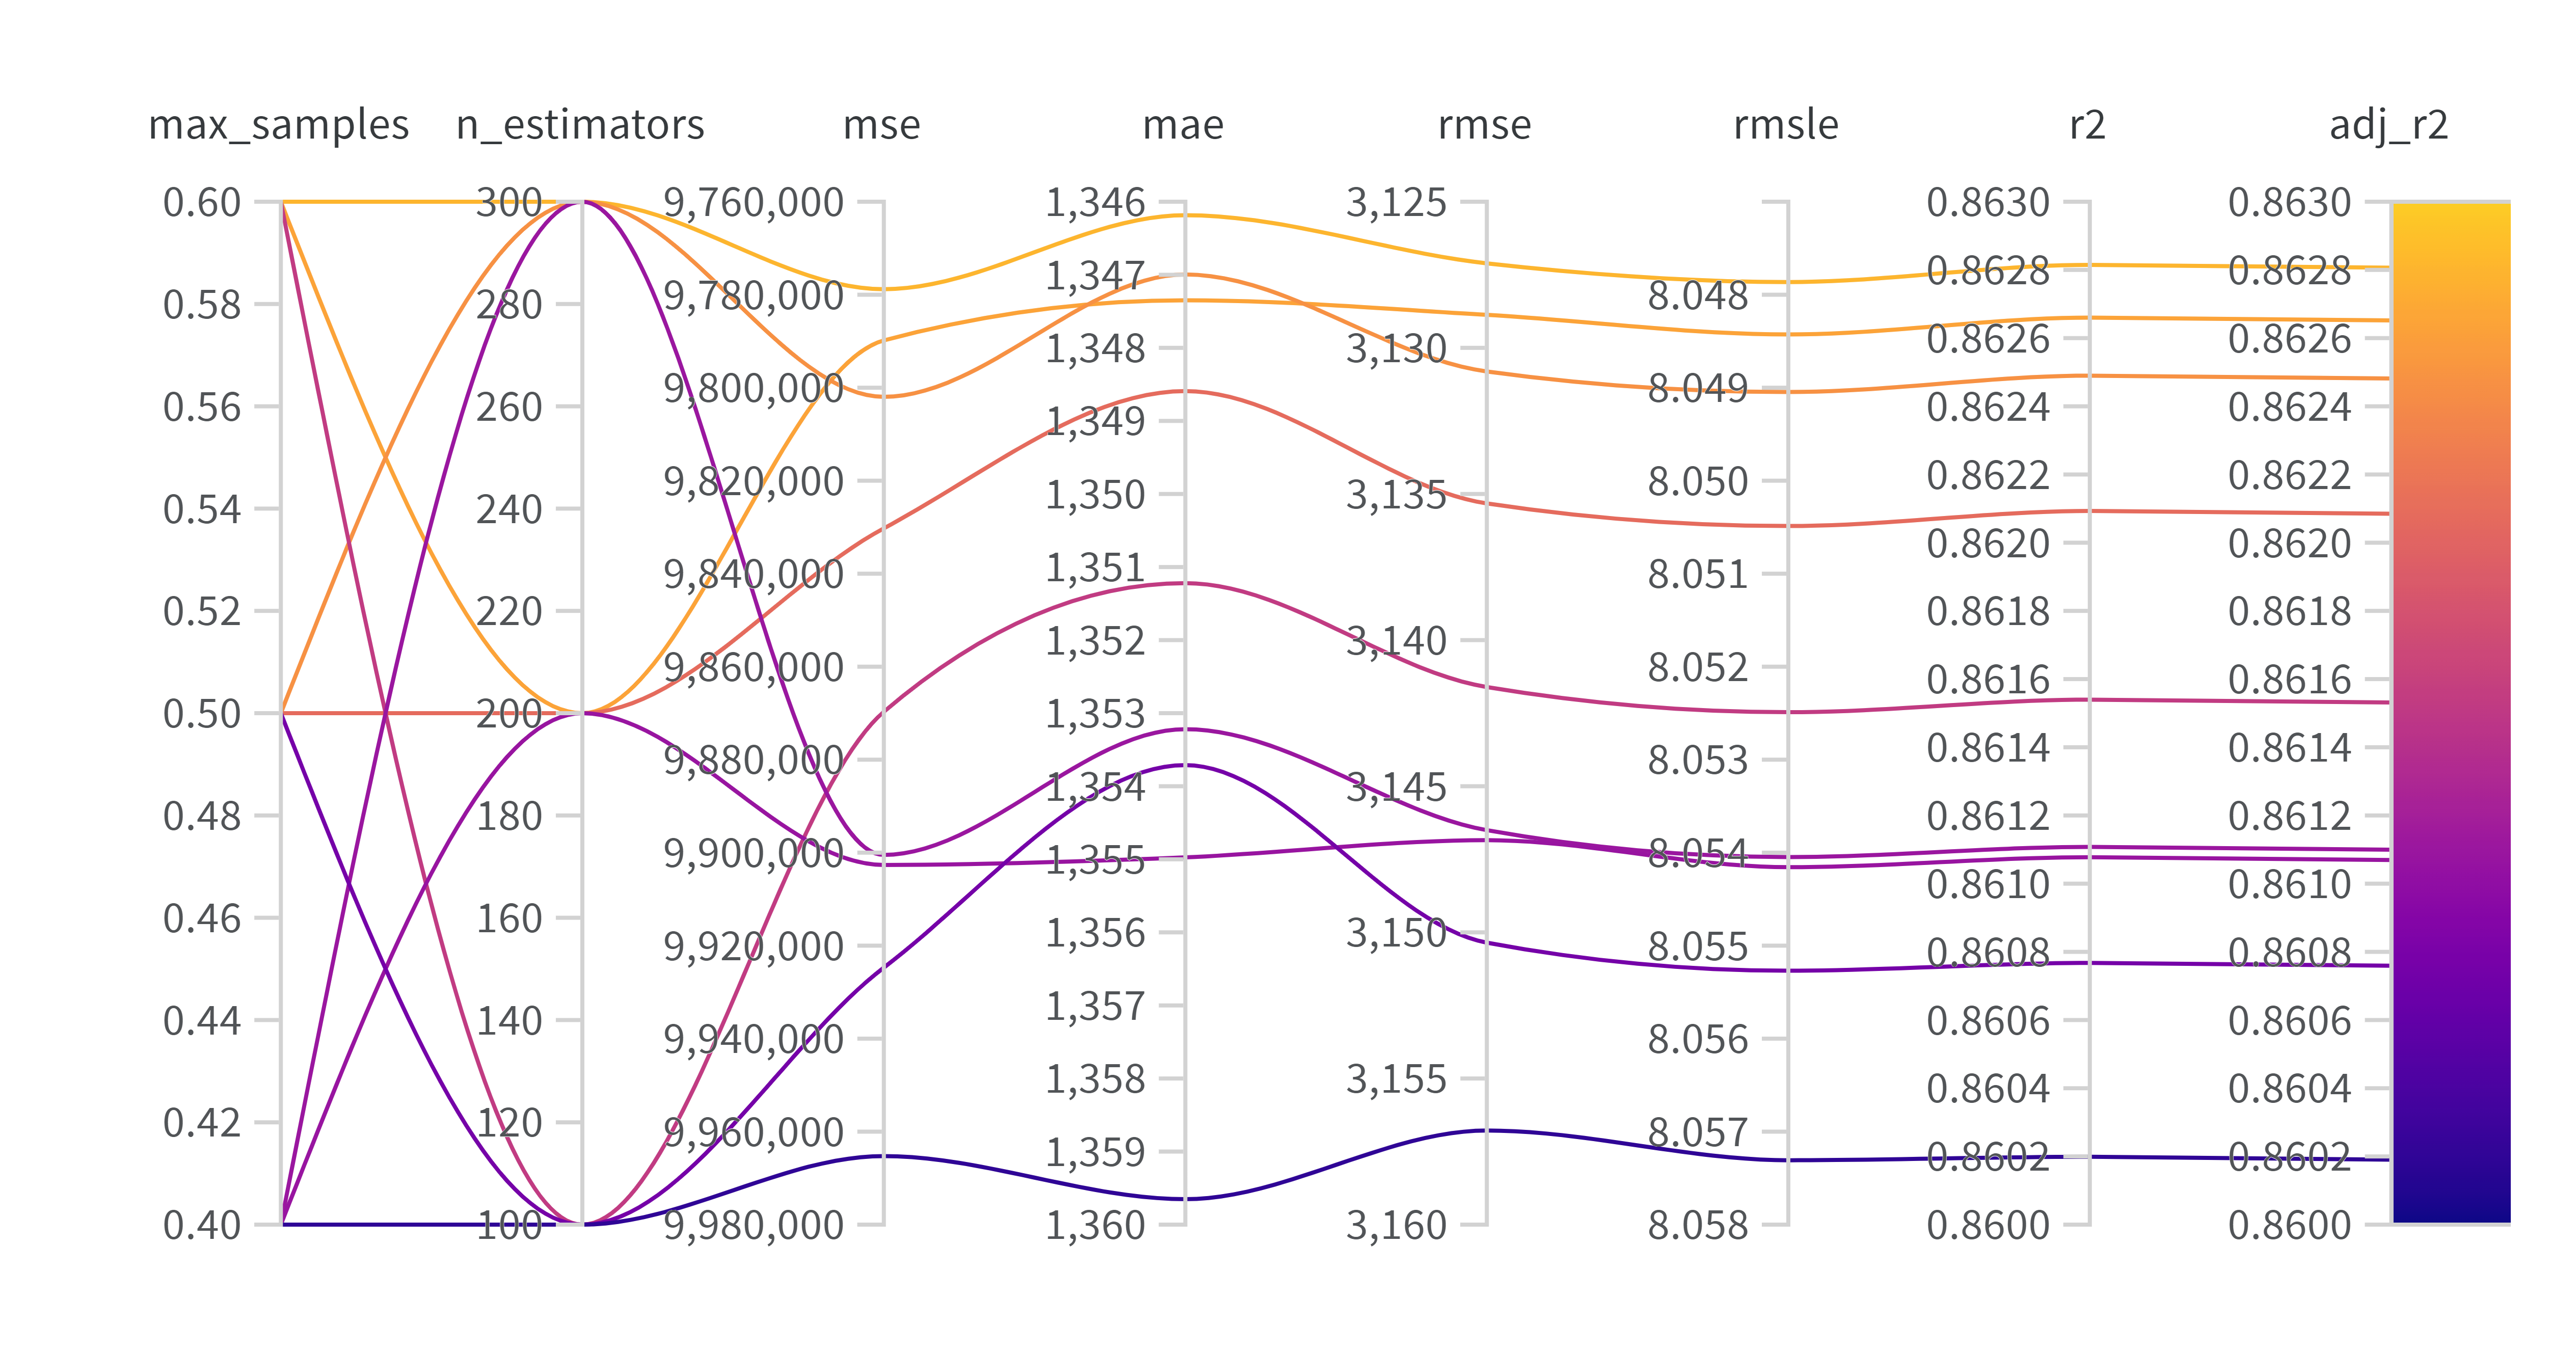

# LGBM Regressor

In [11]:
def LGBM_regressor():
    config_defaults = {
                'objective':'root_mean_squared_error',
                'reg_sqrt': True,
                'metric':'rmse',
                'random_state':42
            }
    wandb.init(config=config_defaults)
    config = wandb.config
    
    X = labeled.iloc[:,1:].values
    Y = labeled.iloc[:,0].values.reshape(-1,1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
    
    model = LGBMRegressor(
      learning_rate=config.learning_rate,
      n_estimators = config.n_estimators,
      random_state = config.random_state)
    
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    find_scores(Y_test, Y_pred, X_train)

In [12]:
lgbm_configs = {
    "name":'LGBMRegressor',
    "method": "grid",
    "metric": {
        "name": "adj_r2",
        "goal": "maximize"
    },
    "parameters": {
        "learning_rate": {
            "values": [0.01, 0.03, 0.05, 0.07]
        },
        "objective": {
            "values": ['root_mean_squared_error']
        },
        "boosting_type": {
            "values": ['gbdt','dart','goss','rf']
        },
        "reg_sqrt": {
            "values": [True]
        },
        "metric": {
            "values": ['rmse']
        },
        "n_estimators": {
            "values": [100,200,300]
        },
        "random_state": {
            "values": [42]
        }
    }
}

sweep_id = wandb.sweep(sweep=lgbm_configs, project="car_resale_value")
wandb.agent(sweep_id=sweep_id, function=LGBM_regressor)

Create sweep with ID: b30glh4n
Sweep URL: https://wandb.ai/rajeshtr/car_resale_value/sweeps/b30glh4n


wandb: Agent Starting Run: 38h98sq1 with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: 1ybay1vn with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e1lcrzj6 with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nrlq3d8p with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: ibla7pjr with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: ez04vt8j with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: ybmhcrjj with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: l5gd8qye with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p63eian0 with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: hnvlh5fq with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: vcv1it9s with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lo20veyy with config:
wandb: 	boosting_type: gbdt
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: 50talv1q with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i2lm4247 with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uykb9pj3 with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3t7ray02 with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: 3e6gq8de with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: dvjrq8fr with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e8vecssu with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nhxnnbcx with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: 7se2z98a with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ywidpy3n with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wkiwe85h with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i9g2ln6p with config:
wandb: 	boosting_type: dart
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8o29ce8o with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r5ryd641 with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vzco3jsi with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6h3g0cyj with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: prze4rug with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5eheauys with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yiljbu3x with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m8p07gh1 with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gixlfn4k with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: iw7unbod with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g47c5jhu with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c2if4ov8 with config:
wandb: 	boosting_type: goss
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: j595u9sh with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: uif1g0u6 with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: 1qdo7fl4 with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.01
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: 8ut2sb2m with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6kt2raic with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: fsmn97sp with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.03
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0vghqee1 with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nxoqwm71 with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


wandb: Network error (ReadTimeout), entering retry loop.
wandb: ERROR Error communicating with wandb process
wandb: ERROR For more info see: https://docs.wandb.ai/library/init#init-start-error
wandb: ERROR Run nxoqwm71 errored: UsageError('Error communicating with wandb process\nFor more info see: https://docs.wandb.ai/library/init#init-start-error')


Problem at: C:\Users\Rajesh\AppData\Local\Temp\ipykernel_33400\1281839519.py 8 LGBM_regressor


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pac5b3vy with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.05
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Agent Starting Run: zady3ury with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 100
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q763gpjz with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 200
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3qrld772 with config:
wandb: 	boosting_type: rf
wandb: 	learning_rate: 0.07
wandb: 	metric: rmse
wandb: 	n_estimators: 300
wandb: 	objective: root_mean_squared_error
wandb: 	random_state: 42
wandb: 	reg_sqrt: True


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


# LGBM Regressor Results

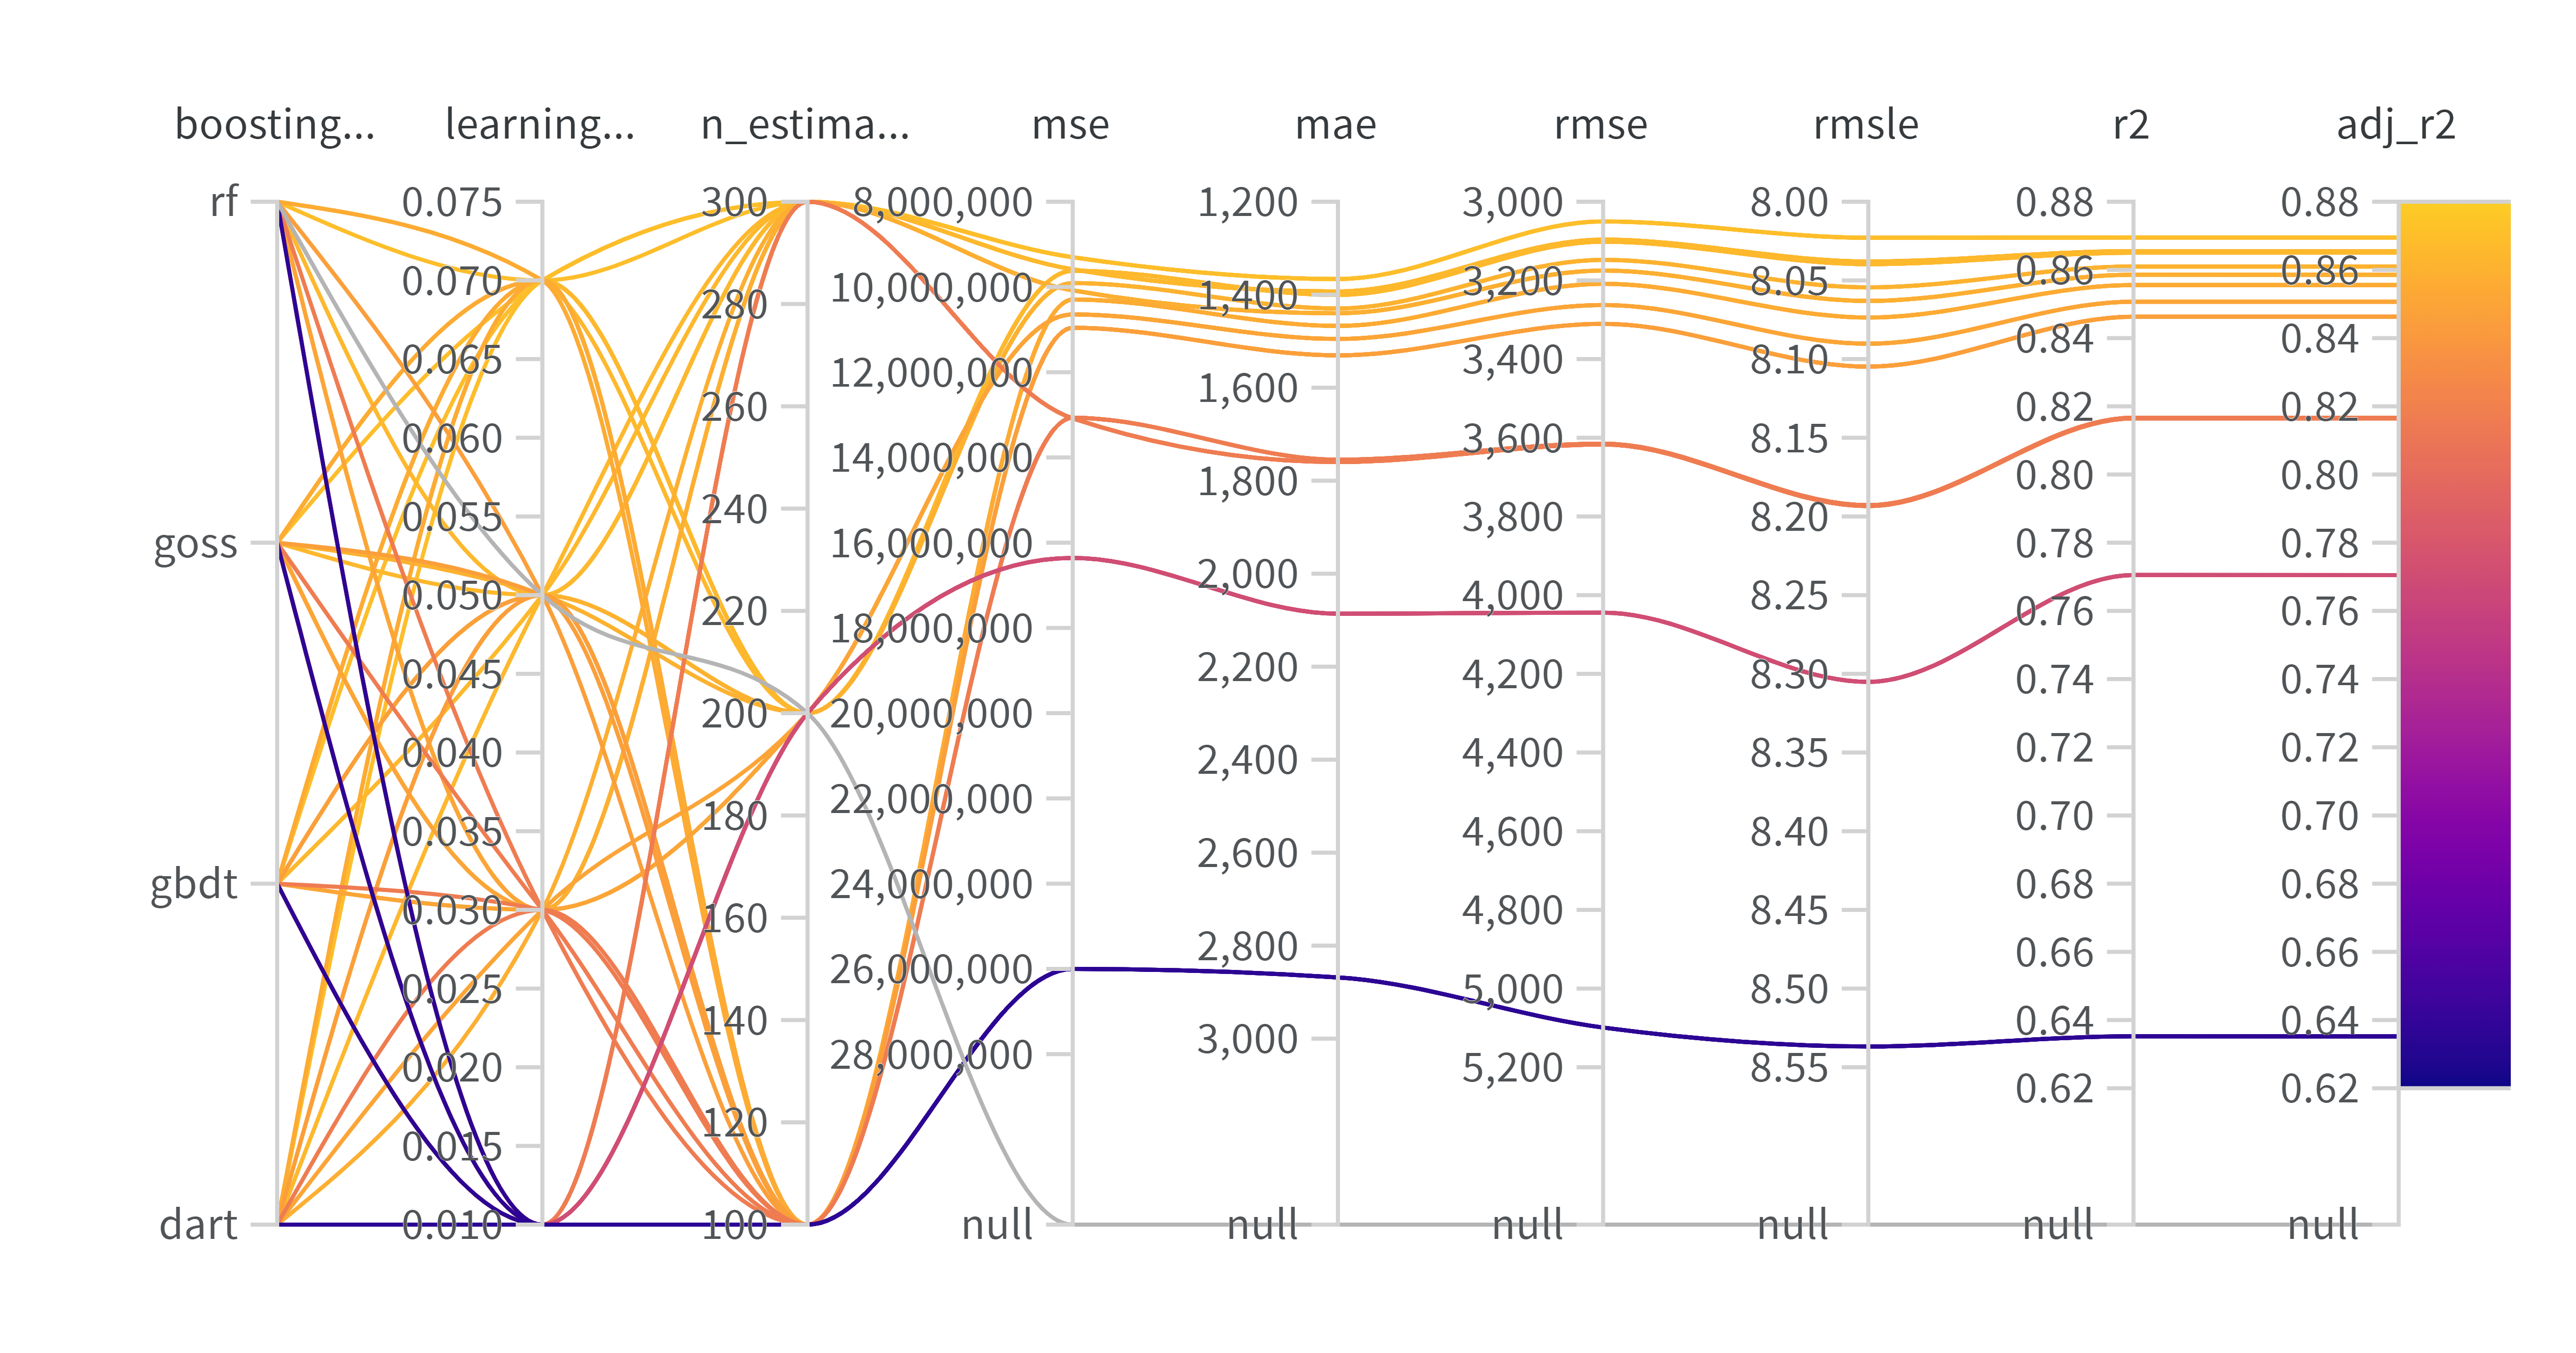